In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [2]:
boston = load_boston()
x, y = boston.data, boston.target

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [4]:
xtrain

array([[1.09600e-02, 5.50000e+01, 2.25000e+00, ..., 1.53000e+01,
        3.94720e+02, 8.23000e+00],
       [7.83932e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.32200e+01],
       [1.80028e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.27610e+02, 1.21400e+01],
       ...,
       [8.64476e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.51700e+01],
       [3.49400e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.96240e+02, 9.97000e+00],
       [1.42502e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.64310e+02, 7.39000e+00]])

In [5]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [6]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x, y)
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)
    print("Alpha: {0:.4f}, R2: {1:.2f}, MSE: {2:.2f}, RMSE:{3:.3f}".format(a,score,mse,np.sqrt(mse)))

Alpha: 0.0001, R2: 0.74, MSE: 21.90, RMSE:4.679
Alpha: 0.0010, R2: 0.74, MSE: 21.92, RMSE:4.681
Alpha: 0.0100, R2: 0.74, MSE: 22.32, RMSE:4.724
Alpha: 0.1000, R2: 0.73, MSE: 23.16, RMSE:4.812
Alpha: 0.3000, R2: 0.71, MSE: 24.08, RMSE:4.907
Alpha: 0.5000, R2: 0.71, MSE: 24.85, RMSE:4.985
Alpha: 0.7000, R2: 0.70, MSE: 25.55, RMSE:5.055
Alpha: 1.0000, R2: 0.69, MSE: 26.50, RMSE:5.148


In [7]:
elastic = ElasticNet(alpha=0.01).fit(xtrain, ytrain)

In [8]:
ypred = elastic.predict(xtest)
ypred

array([24.36090664, 25.68198708, 18.27222013, 34.50938577, 16.18710585,
       21.47643262, 23.23416532, 10.16858381, 37.61022146, 21.58479248,
       19.27163162, 21.51570816, 19.57910687, 32.94106462, 28.8409536 ,
       22.15382909, 12.91403756, 25.7033331 , 23.34750345, 37.53619802,
       20.21756454, 30.74126102, 20.46454041, 15.17591053, 13.61719175,
        6.72801244, 15.85321495, 28.27561988, 36.12167409, 21.12937318,
       27.64444674, 12.00345084, 21.14446783, 30.23022221, 13.02740528,
       20.61758373, 19.162623  , 12.31551325, 42.39886635, 10.37806964,
        8.40136165, 23.2409663 , 17.40709577,  9.45726718, 31.79433511,
       19.7332379 , 23.54408065, 18.34791747, 30.32883425, 19.97542473,
       24.50559709, 37.657797  , 28.07489906, 23.8812092 , 12.68261255,
       20.01429774, 30.664375  , 18.40892271, 17.0272267 , 20.78499223,
       26.63187379, 10.22646505,  9.37061288, 30.39274553, 30.27768024,
       20.61181505, 30.54692412, 25.12895517, 31.57596473, 38.94

In [9]:
score = elastic.score(xtest, ypred)
score

1.0

In [10]:
mse = mean_squared_error(ytest, ypred)
mse

16.9254229593072

In [11]:
print('R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}'.format(score, mse, np.sqrt(mse)))

R2:1.000, MSE:16.93, RMSE:4.11


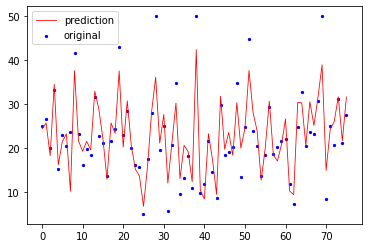

In [12]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color='blue', label='original')
plt.plot(x_ax, ypred, lw=0.8, color='red', label='prediction')
plt.legend()
plt.show()

In [13]:
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

0.0001
38.715029620135454


In [14]:
ypred = model.predict(xtest)
ypred

array([22.85389549, 25.5608651 , 18.77159787, 34.87799298, 15.9000967 ,
       20.6849525 , 22.93319848, 10.31814046, 37.73829939, 20.37763339,
       18.66013626, 21.55151126, 19.10086372, 33.252282  , 28.72960107,
       22.21011016, 12.79359838, 25.6688879 , 23.49883596, 36.81404937,
       19.97233492, 30.81441829, 20.21906735, 15.10837478, 11.50038931,
        6.6255171 , 15.7255968 , 28.30816877, 36.75120317, 20.20002813,
       27.46625632, 11.88515393, 21.51182106, 29.99365882, 13.25053021,
       20.40298989, 18.58142268, 11.67477879, 42.77187324, 10.20238513,
        8.82851878, 24.28382275, 18.57894871,  9.03363917, 32.35134746,
       19.76954264, 24.33050921, 19.507136  , 30.41663217, 20.13155757,
       24.20992945, 38.06463255, 27.8079125 , 24.23067746, 13.58877164,
       20.57986717, 30.44154718, 18.33241897, 16.17982536, 20.62285065,
       26.05383602,  8.16467947,  9.70888378, 30.94896304, 30.197395  ,
       20.8845669 , 30.77823735, 24.88366143, 31.27383663, 39.39

In [15]:
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print('R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}'.format(score, mse, np.sqrt(mse)))

R2:0.817, MSE:17.39, RMSE:4.17


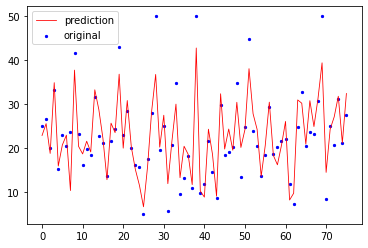

In [16]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color='blue', label='original')
plt.plot(x_ax, ypred, lw=0.8, color='red', label='prediction')
plt.legend()
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [21]:
pipe.score(X_test, y_test)

0.88

In [22]:
from sklearn.datasets import load_iris
iriskk = load_iris()
X, y = iriskk.data, iriskk.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])


In [25]:
model = pipe2.fit(X_train, y_train)

In [26]:
pipe2.score(X_test, y_test)

0.9736842105263158

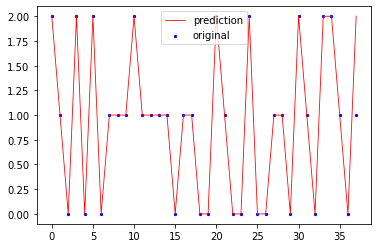

In [27]:
y_pred = model.predict(X_test)
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color='blue', label='original')
plt.plot(x_ax, y_pred, lw=0.8, color='red', label='prediction')
plt.legend()
plt.show()
